# Example of visualising the agent's training history performance

`WEIGHTS` : Path to the pre-trained weights
`METRICS` : Path to the training history, or None

In [1]:
WEIGHTS = './output-2/weights-75000.pth'
METRICS = './output-2/metrics.csv'

In [11]:
import sys
import torch
import gymnasium as gym
import matplotlib.pyplot as plt

sys.path.append("../")
from DQN import DeepQ                                                                       # noqa

sys.path.append("../../")
from help.visualisation.plot import graph2                                                  # noqa
from help.visualisation.gif import gif                                                      # noqa

## Parameters

In [3]:
network = {"inputs": 128, "outputs": 5, "nodes": [80, 50]}
optimizer = {"optimizer": torch.optim.RMSprop, "lr": 0.0025}
skip = 5

## Setup

In [84]:
value_agent = DeepQ(
    network=network, optimizer=optimizer,
    exploration_rate=0.001,
)

weights = torch.load(WEIGHTS, map_location=torch.device('cpu'))
value_agent.load_state_dict(weights)

environment = gym.make('ALE/Tetris-v5', render_mode="rgb_array",
                       obs_type="grayscale", frameskip=1, repeat_action_probability=0.0)
environment.metadata["render_fps"] = 30

In [137]:
import random
stat = environment.reset()[0]
for _ in range(2000):
    stat = environment.step(random.randint(0, 4))[0]

torch.Size([176, 42])
torch.Size([1, 176, 42])
torch.Size([1, 30, 10])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
         [0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
         [1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
         [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
         [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
         [0

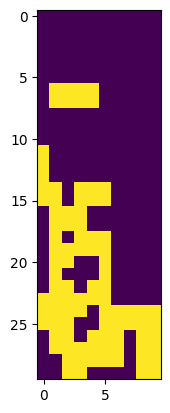

In [177]:
import torch.nn.functional as F

height = slice(27, 203)
width = slice(22, 64)

x = torch.tensor(stat, dtype=torch.float32)[height, width]

print(x.shape)
x = x.view(-1, 176, 42)
print(x.shape)
x = F.max_pool2d(x, kernel_size=(6,4), stride=(6,4), padding=(3,2))[:,:,1:]
print(x.shape)

x[x != 111] = 1
x[x == 111] = 0

plt.imshow(x[0])
print(x)

In [181]:
x = x.view(x.shape[1:])
x.shape

torch.Size([30, 10])

In [221]:
x

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],


In [222]:
for i, row in enumerate(x.__reversed__()):
    if all(row == 0):
        print(x.shape[0] - i, row)
        break

12 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [190]:
res = all(x[5] >= 0.0)
res

True

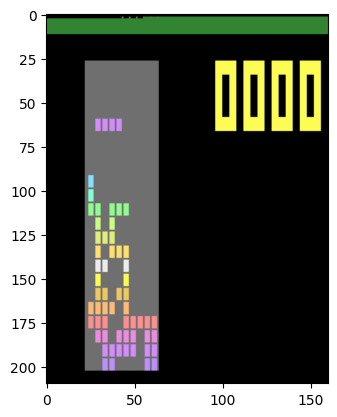

In [149]:
plt.imshow(environment.render())

## Visualise

### Plotting the metrics from the csv-file created during training.

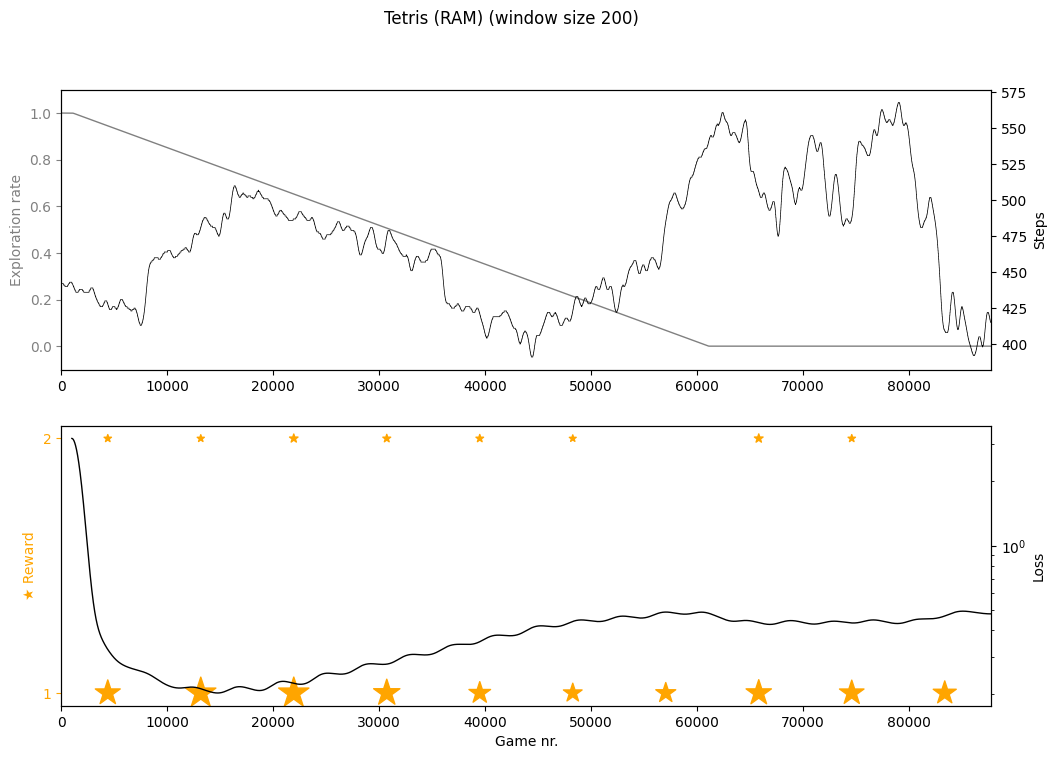

In [12]:
graph2(METRICS, title="Tetris (RAM)", window=200) if METRICS else None
plt.savefig('./metrics.png') if METRICS else None
plt.show() if METRICS else None

### Creating and saving a gif of the agent in action. The gif will be saved to the given path.

In [6]:
gif(environment, value_agent, '../tetris.gif', skip, 40)